In [36]:
import pandas as pd

# Define the file path
file_path = '/Users/noachmeged/Documents/Ironhack/amz_uk_price_prediction_dataset.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame


df.head().shape()


TypeError: 'tuple' object is not callable

In [2]:

#Crosstab Analysis: Create a crosstab between the product category and the isBestSeller status.


import pandas as pd

# Assuming your DataFrame is named df
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Display the crosstab result
crosstab_result.sort_values(by=True, ascending=False).head


<bound method NDFrame.head of isBestSeller                  False  True 
category                                  
Grocery                        9008    556
Health & Personal Care         9017    552
Baby                          14709    341
Sports & Outdoors            835935    330
Power & Hand Tools             8353    306
...                             ...    ...
Downhill Ski Boots             1284      0
Digital Frames                  774      0
Motorbike Chassis               107      0
Motorbike Drive & Gears         250      0
eBook Readers & Accessories     246      0

[296 rows x 2 columns]>

In [3]:
# Create the crosstab
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate the proportion of best-sellers (True) for each category
crosstab_result['proportion_best_sellers_in_%'] = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False]) *100

# Sort by the proportion in descending order
sorted_proportion = round(crosstab_result.sort_values(by='proportion_best_sellers_in_%', ascending=False),3)

# Display the result
print(sorted_proportion)

# Are there categories where being a best-seller is more prevalent? Yes groceries, Smarthome and Healthc..
#Grocery                            9008   556                     5.813
#Smart Home Security & Lighting       98     6                     5.769
#Health & Personal Care             9017   552                     5.769
#Mobile Phone Accessories            248    11                     4.247
#Power & Hand Tools                 8353   306                     3.534

isBestSeller                      False  True  proportion_best_sellers_in_%
category                                                                   
Grocery                            9008   556                         5.813
Smart Home Security & Lighting       98     6                         5.769
Health & Personal Care             9017   552                         5.769
Mobile Phone Accessories            248    11                         4.247
Power & Hand Tools                 8353   306                         3.534
...                                 ...   ...                           ...
CD, Disc & Tape Players            8798     0                         0.000
General Music-Making Accessories    259     0                         0.000
Snowboard Boots                    1449     0                         0.000
Boxes & Organisers                  911     0                         0.000
eBook Readers & Accessories         246     0                         0.000

[296 rows x

In [4]:
# Statistical Tests: Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

# Create the crosstab
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab_result)

# Display the results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.5f}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant relationship between product category and best-seller status (Reject H0).")
else:
    print("There is no significant relationship between product category and best-seller status (Fail to reject H0).")



    # The best-seller status is not independent of the product category, meaning there is a dependency between the two variables. 
    # Certain product categories are more likely to have best-sellers than others.


Chi-square Statistic: 36540.20270061387
Degrees of Freedom: 295
P-value: 0.00000
There is a significant relationship between product category and best-seller status (Reject H0).


In [5]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab_result)

# Total number of observations
n = crosstab_result.values.sum()

# Compute Cramér's V
cramers_v = np.sqrt(chi2_stat / (n * (min(crosstab_result.shape) - 1)))

# Print Cramér's V and interpretation
print(f"Cramér's V: {cramers_v:.2f}")

if cramers_v < 0.10:
    print("Very weak association")
elif cramers_v < 0.20:
    print("Weak association")
elif cramers_v < 0.40:
    print("Moderate association")
elif cramers_v < 0.60:
    print("Strong association")
else:
    print("Very strong association")

# Weak association: The relationship between the product category and best-seller status is noticeable, but not very strong.
# There are some patterns of dependency, but other factors likely influence best-seller status as well.

Cramér's V: 0.12
Weak association


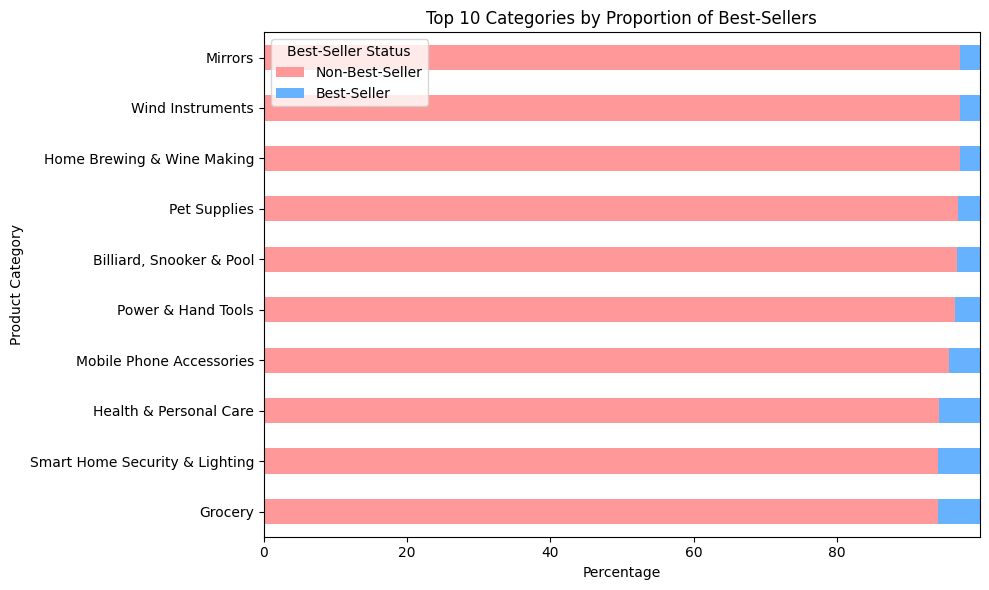

In [6]:
# Visualizations: Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of category and isBestSeller
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate the proportion of best-sellers (True) for each category
crosstab_result['proportion_best_sellers'] = crosstab_result[True] / crosstab_result.sum(axis=1)

# Sort the categories by proportion of best-sellers in descending order
crosstab_sorted = crosstab_result.sort_values(by='proportion_best_sellers', ascending=False)

# Select the top 10 categories with the highest proportion of best-sellers
top_10_categorized = crosstab_sorted.head(10)

# Normalize the crosstab (percentage for each category)
top_10_normalized = top_10_categorized.div(top_10_categorized.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart for the top 10 categories (horizontal)
ax = top_10_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B2FF'])

# Set labels and title
plt.ylabel('Product Category')
plt.xlabel('Percentage')
plt.title('Top 10 Categories by Proportion of Best-Sellers')
plt.legend(title='Best-Seller Status', labels=['Non-Best-Seller', 'Best-Seller'])

# Display the plot
plt.tight_layout()
plt.show()


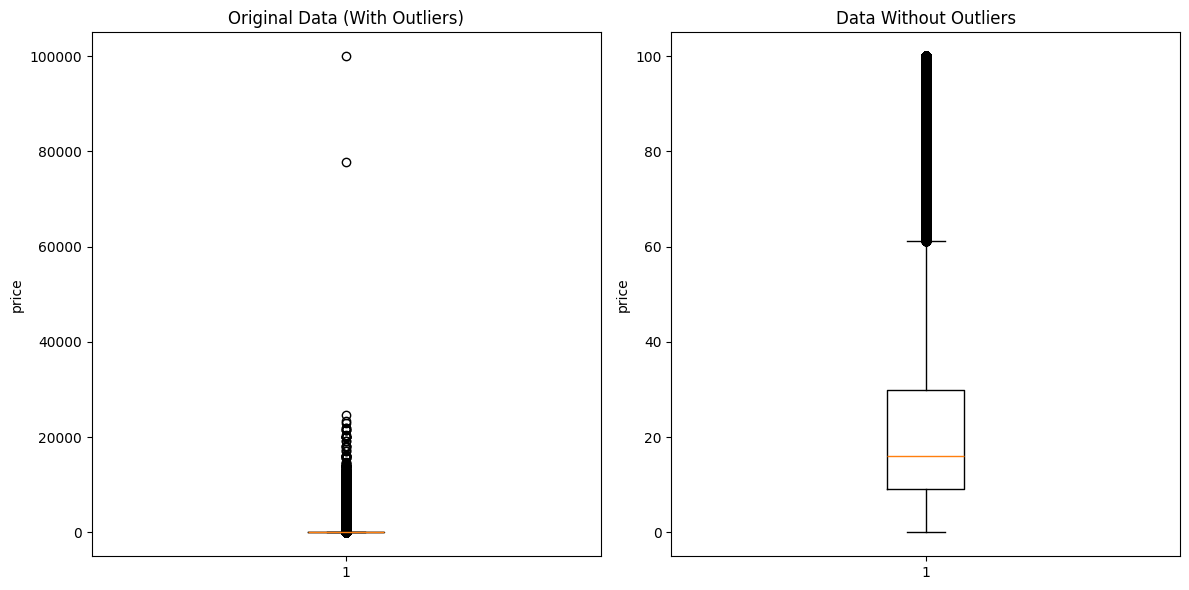

In [9]:
import matplotlib.pyplot as plt

# 1. Bereken Q1, Q3 en IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# 2. Bereken de grenzen voor outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Verwijder outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# 4. Visualiseren met boxplots
plt.figure(figsize=(12, 6))

# Boxplot originele data
plt.subplot(1, 2, 1)
plt.boxplot(df['price'])
plt.title("Original Data (With Outliers)")
plt.ylabel("price")

# Boxplot data zonder outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers['price'])
plt.title("Data Without Outliers")
plt.ylabel("price")

plt.tight_layout()
plt.show()


In [42]:
# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
# 2. Calculate Q1, Q3, and IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# 3. Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliers and overwrite the original DataFrame
original_len = len(df)
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
new_len = len(df)

# 5. Print summary
removed_rows = original_len - new_len
print(f"Original number of rows: {original_len}")
print(f"Number of rows after removing outliers: {new_len}")
print(f"Number of outliers removed: {removed_rows}")


Original number of rows: 2443651
Number of rows after removing outliers: 2115963
Number of outliers removed: 327688


/var/folders/70/qw9qt2rd3c3_qj2hjz4wfvxm0000gn/T/ipykernel_81169/896058656.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=filtered_df, palette='Set2')


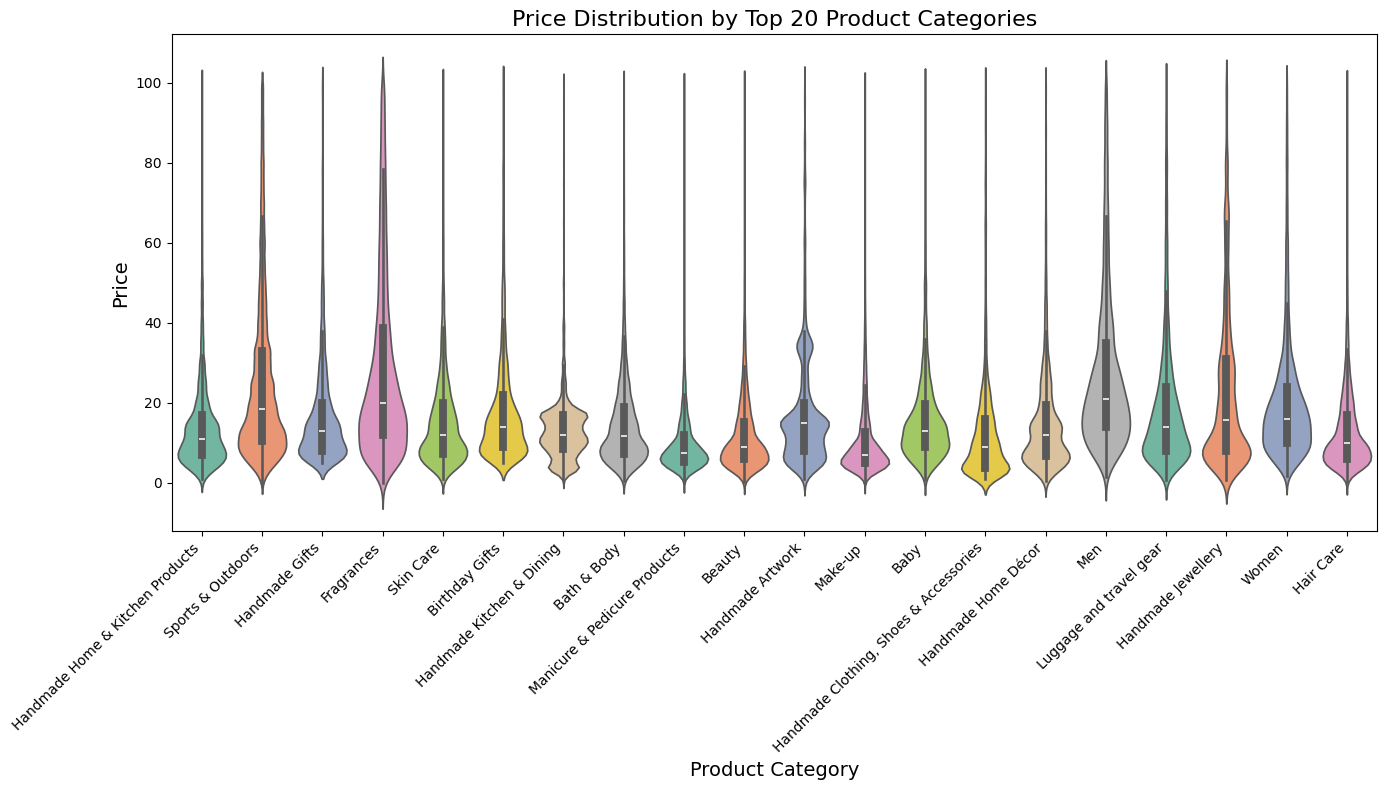

In [11]:
#Violin Plots:

#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter de top 20 categorieën op basis van aantal
top_20_categories = df['category'].value_counts().nlargest(20).index
filtered_df = df[df['category'].isin(top_20_categories)]

# Violin plot van de prijsverdeling per productcategorie
plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=filtered_df, palette='Set2')

# Titels en labels
plt.title('Price Distribution by Top 20 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Draai de x-labels voor betere leesbaarheid

plt.tight_layout()
plt.show()


In [ ]:
#Which product category tends to have the highest median price? Don't filter here by top categories.
median_prices = df.groupby('category')['price'].median()
median_prices.sort_values(ascending=False)

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

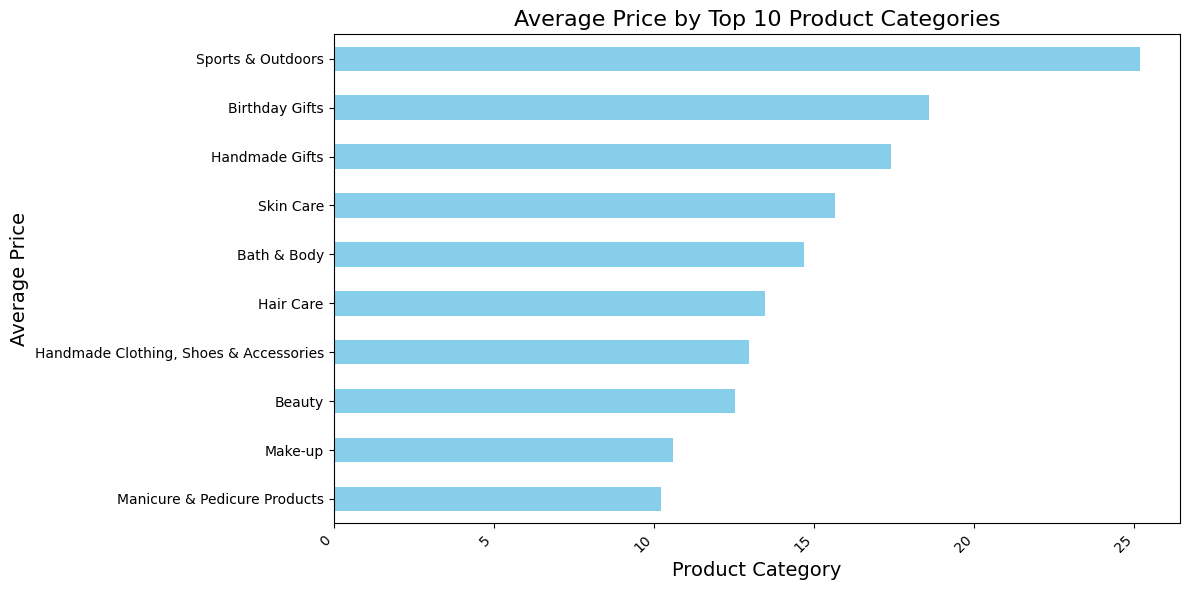

In [ ]:
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

# Filter de top 10 categorieën op basis van aantal
top_10_categories = df['category'].value_counts().nlargest(10).index
filtered_df = df[df['category'].isin(top_10_categories)]

# Bereken de gemiddelde prijs per productcategorie
avg_prices = filtered_df.groupby('category')['price'].mean()

# Maak de bar chart
plt.figure(figsize=(12, 6))
avg_prices.sort_values().plot(kind='barh', color='skyblue')

# Titels en labels
plt.title('Average Price by Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Draai de x-labels voor betere leesbaarheid

plt.tight_layout()
plt.show()


In [24]:
# Bereken de gemiddelde prijs per productcategorie
avg_prices = df.groupby('category')['price'].mean()

# Zoek de productcategorie met de hoogste gemiddelde prijs
highest_avg_category = avg_prices.idxmax()
highest_avg_price = avg_prices.max()

# Toon de resultaten
print(f"The product category with the highest average price is '{highest_avg_category}' with an average price of {highest_avg_price:.2f}.", avg_prices.sort_values(ascending=False))


The product category with the highest average price is 'Motherboards' with an average price of 68.77. category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64


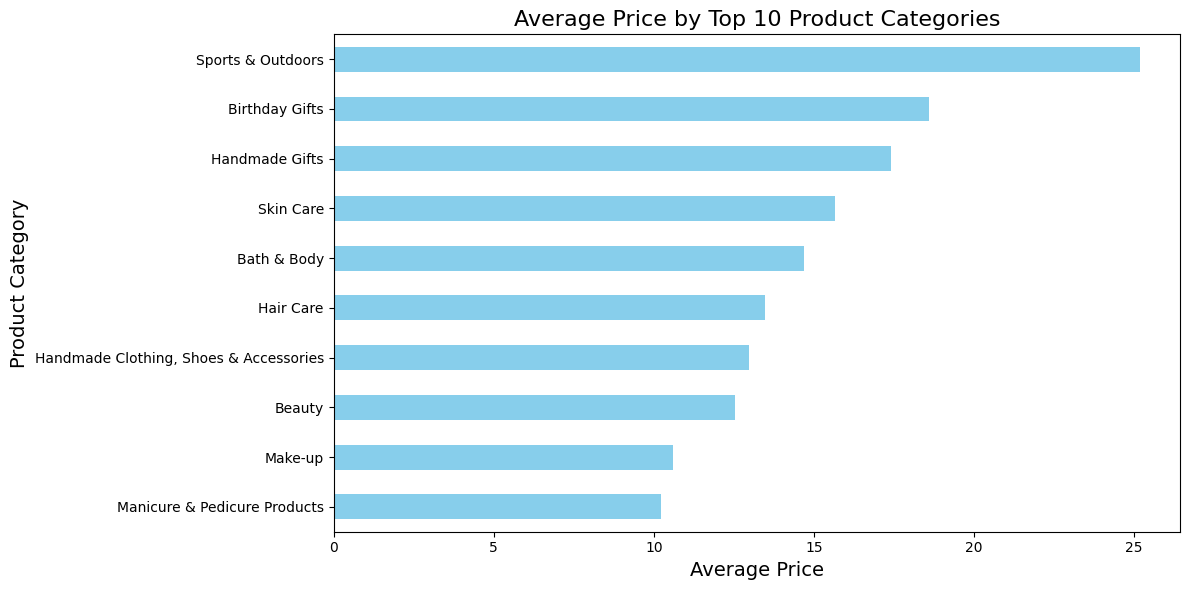

The product category with the highest average price is 'Sports & Outdoors' with an average price of 25.17.


In [23]:
import matplotlib.pyplot as plt

# Bereken de gemiddelde prijs per productcategorie
avg_prices = df.groupby('category')['price'].mean()

# Filter de top 10 categorieën op basis van aantal
top_10_categories = df['category'].value_counts().nlargest(10).index
filtered_df = df[df['category'].isin(top_10_categories)]

# Bereken de gemiddelde prijs voor de top 10 categorieën
avg_prices_top_10 = filtered_df.groupby('category')['price'].mean()

# Maak de bar chart
plt.figure(figsize=(12, 6))
avg_prices_top_10.sort_values().plot(kind='barh', color='skyblue')

# Titels en labels
plt.title('Average Price by Top 10 Product Categories', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.tight_layout()
plt.show()

# Identificeer welke categorie de hoogste gemiddelde prijs heeft
highest_avg_category = avg_prices_top_10.idxmax()
highest_avg_price = avg_prices_top_10.max()

print(f"The product category with the highest average price is '{highest_avg_category}' with an average price of {highest_avg_price:.2f}.")


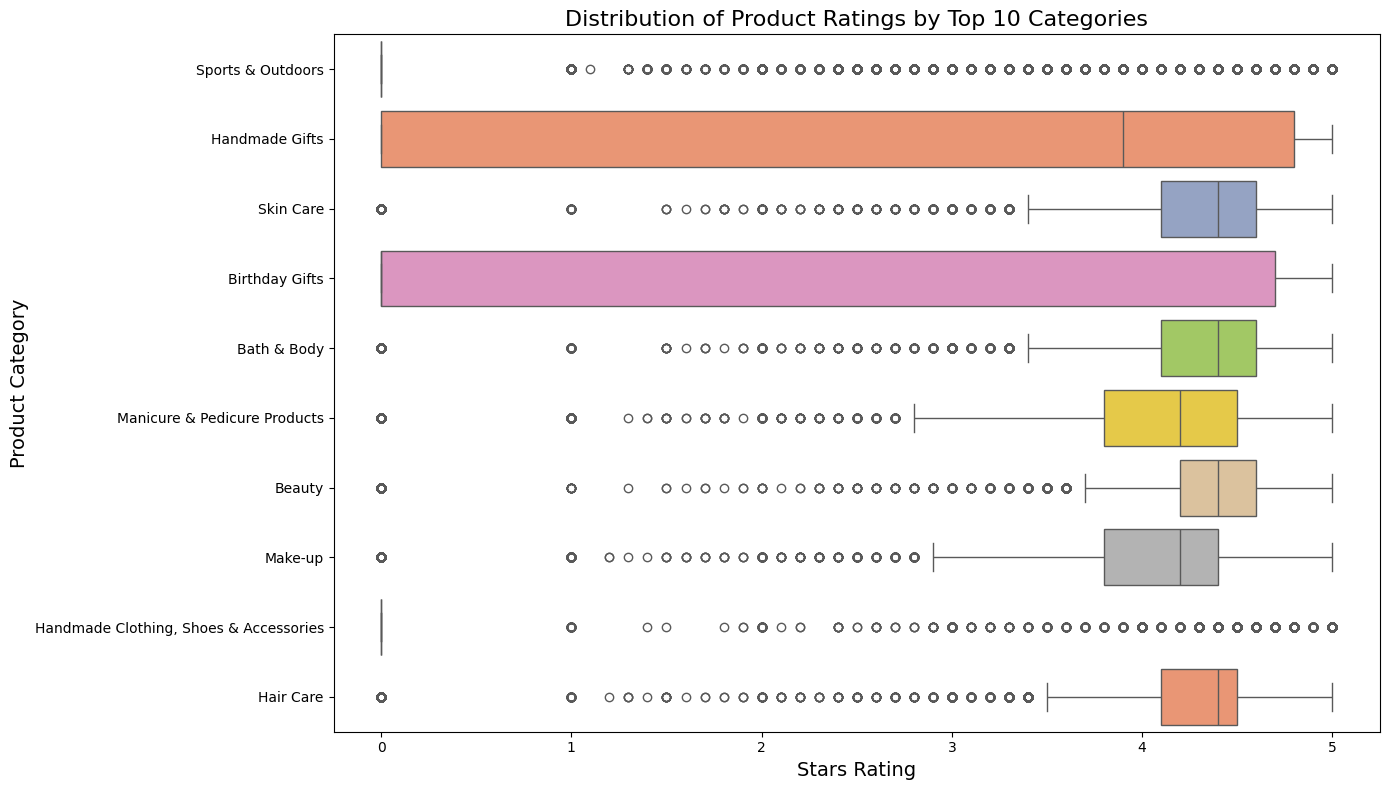

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter de top 10 categorieën op basis van aantal
top_10_categories = df['category'].value_counts().nlargest(10).index
filtered_df = df[df['category'].isin(top_10_categories)]

# Maak de boxplots van productbeoordelingen per categorie met omgedraaide assen
plt.figure(figsize=(14, 8))
sns.boxplot(x='stars', y='category', data=filtered_df, hue='category', palette='Set2', legend=False)

# Titels en labels
plt.title('Distribution of Product Ratings by Top 10 Categories', fontsize=16)
plt.xlabel('Stars Rating', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.tight_layout()
plt.show()


In [31]:
# Bereken de mediaanbeoordeling per productcategorie zonder te filteren
median_ratings = df.groupby('category')['stars'].median()

# Zoek de productcategorie met de hoogste mediaanbeoordeling
highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"The product category with the highest median rating is '{highest_median_category}' with a median rating of {highest_median_rating:.2f}.")


The product category with the highest median rating is 'Computer Memory' with a median rating of 4.70.


In [33]:
import scipy.stats as stats

# Voer de Pearson correlatietest uit tussen 'price' en 'stars'
correlation_coefficient, p_value = stats.pearsonr(df['price'], df['stars'])

# Resultaten weergeven
print(f"Correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretatie
if p_value < 0.05:
    print("There is a statistically significant correlation between price and stars.")
else:
    print("There is no statistically significant correlation between price and stars.")


Correlation coefficient: -0.08
P-value: 0.0000
There is a statistically significant correlation between price and stars.


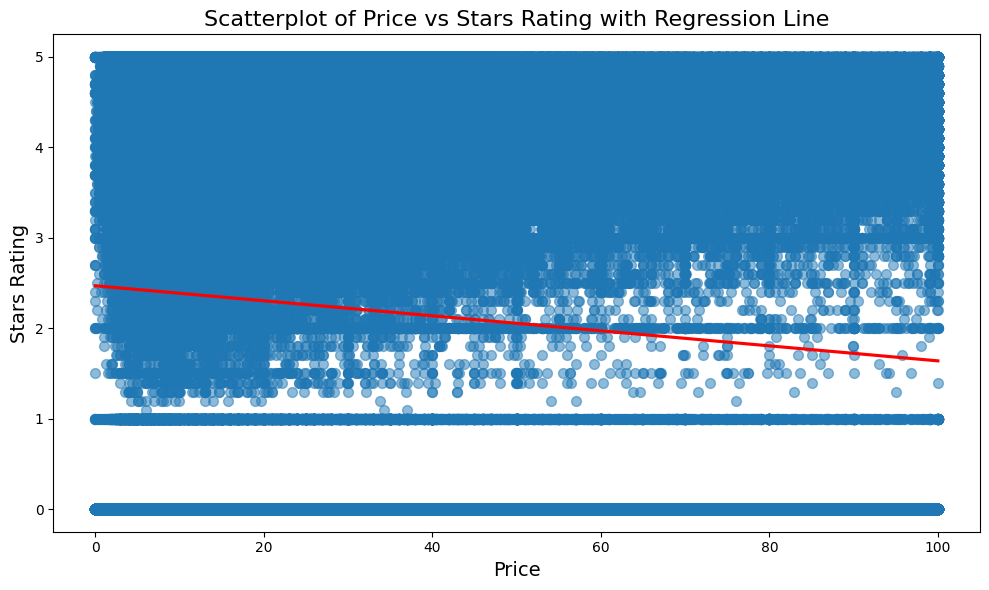

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Maak de scatterplot met regressielijn
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='stars', data=df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

# Titels en labels
plt.title('Scatterplot of Price vs Stars Rating with Regression Line', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Stars Rating', fontsize=14)

plt.tight_layout()
plt.show()


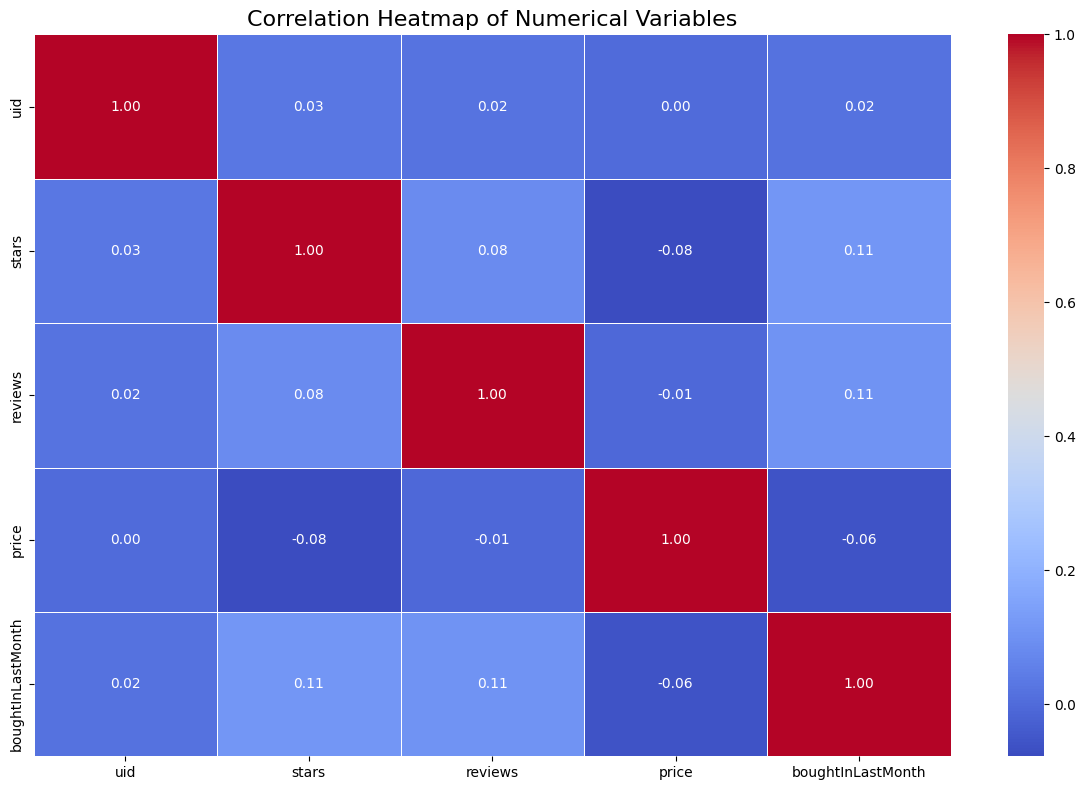

In [45]:
# Selecteer alleen numerieke kolommen
numerical_df = df.select_dtypes(include=['number'])

# Bereken de correlatiematrix voor de numerieke kolommen
correlation_matrix = numerical_df.corr()

# Maak de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Titels en labels
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()


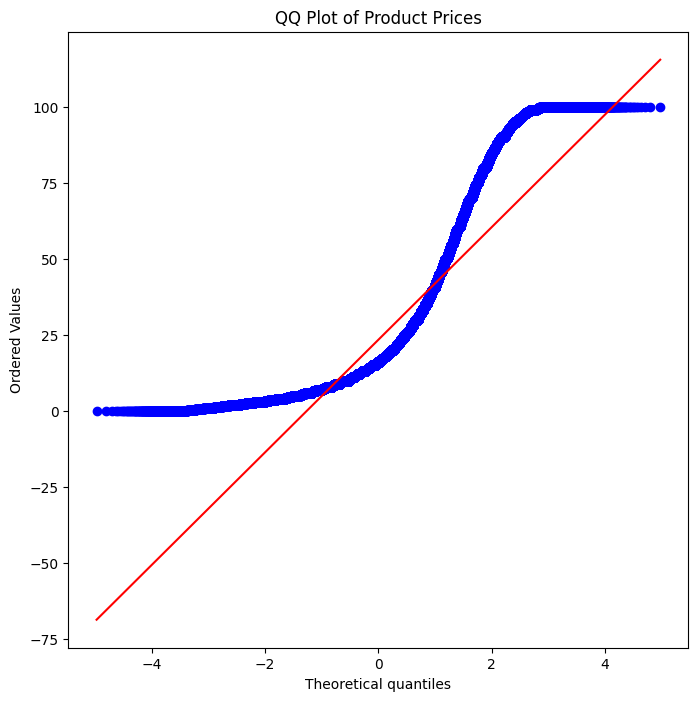

In [44]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Maak de QQ-plot voor 'price'
plt.figure(figsize=(8, 8))
stats.probplot(df['price'], dist="norm", plot=plt)

# Titel toevoegen
plt.title('QQ Plot of Product Prices')
plt.show()
